##  pandas是基于Numpy构建的。目的是以numpy为中心的应用变得更加的简单

In [3]:
import pandas as pd
from pandas import Series,DataFrame

## Series类型
#### 这个类型就类似于一维数组对象。 它是由一组数据以及一组与之相关的数据标签(索引)组成的。

In [4]:
obj = Series([1,2,3,4,5,6])
print(obj)

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64


In [5]:
print(obj.values)

[1 2 3 4 5 6]


In [6]:
obj.index

RangeIndex(start=0, stop=6, step=1)

### 自定义索引

In [8]:
obj = Series(['a','b','c','d','e'], index=[1,2,3,4,5])
obj

1    a
2    b
3    c
4    d
5    e
dtype: object

In [9]:
obj[1]

'a'

In [10]:
data = {'a':100000, 'b':20000, 'c':30000}
obj = Series(data)
obj

a    100000
b     20000
c     30000
dtype: int64

In [11]:
obj['a']

100000

In [13]:
keys = ['a','c']
obj_1 = Series(data, index=keys)
obj_1

a    100000
c     30000
dtype: int64

### 缺失数据处理

In [14]:
data = {'a':100000, 'b':20000, 'c':30000}
obj = Series(data)
pd.isnull(obj)

a    False
b    False
c    False
dtype: bool

In [15]:
pd.notnull(obj)

a    True
b    True
c    True
dtype: bool

In [17]:
data = {'LiLei':None, 'HanMeimei':25, 'Tony':None, 'Jack':50}
obj = Series(data)
obj

##  None   null ""

LiLei         NaN
HanMeimei    25.0
Tony          NaN
Jack         50.0
dtype: float64

In [18]:
obj.name = 'NameAndAge'
obj

LiLei         NaN
HanMeimei    25.0
Tony          NaN
Jack         50.0
Name: NameAndAge, dtype: float64

In [19]:
obj.index.name = "姓名"
obj

姓名
LiLei         NaN
HanMeimei    25.0
Tony          NaN
Jack         50.0
Name: NameAndAge, dtype: float64

### DataFrame 类型
####  DataFrame 是一个表格型的数据结构，它含有一组有序的列，每列可以是不同值的类型，数值、字符串、布尔值都可以
#### DataFrame 本身有行索引，也有列索引
####  DataFrame可以理解成是由Series组成的字典

In [21]:
data = {
    '60年代': ['狗子','嘎子','二妞'],
    '70年代': ['卫国','爱国','建国'],
    '80年代': ['李雷','韩梅梅','张伟'],
}
frame_data = DataFrame(data)
frame_data

,60年代,70年代,80年代
0,狗子,卫国,李雷
1,嘎子,爱国,韩梅梅
2,二妞,建国,张伟


In [22]:
frame_data['70年代']

0    卫国
1    爱国
2    建国
Name: 70年代, dtype: object

In [24]:
import numpy as np
dates = pd.date_range('20190701', periods=6)
dates

DatetimeIndex(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
               '2019-07-05', '2019-07-06'],
              dtype='datetime64[ns]', freq='D')

In [25]:
df = pd.DataFrame(np.random.rand(6,4), index=dates, columns = list('ABCD'))

df


,A,B,C,D
2019-07-01,0.644014,0.882428,0.688674,0.606004
2019-07-02,0.612072,0.058119,0.080613,0.143736
2019-07-03,0.206858,0.262666,0.330462,0.561205
2019-07-04,0.516505,0.480064,0.618071,0.934153
2019-07-05,0.239501,0.528001,0.287428,0.483968
2019-07-06,0.723824,0.138506,0.060931,0.520513


In [26]:
df.T

,2019-07-01 00:00:00,2019-07-02 00:00:00,2019-07-03 00:00:00,2019-07-04 00:00:00,2019-07-05 00:00:00,2019-07-06 00:00:00
A,0.644014,0.612072,0.206858,0.516505,0.239501,0.723824
B,0.882428,0.058119,0.262666,0.480064,0.528001,0.138506
C,0.688674,0.080613,0.330462,0.618071,0.287428,0.060931
D,0.606004,0.143736,0.561205,0.934153,0.483968,0.520513


In [27]:
df['20190701':'20190703']

,A,B,C,D
2019-07-01,0.644014,0.882428,0.688674,0.606004
2019-07-02,0.612072,0.058119,0.080613,0.143736
2019-07-03,0.206858,0.262666,0.330462,0.561205


In [28]:
df.loc['20190701':'20190703', ['A','B']]

,A,B
2019-07-01,0.644014,0.882428
2019-07-02,0.612072,0.058119
2019-07-03,0.206858,0.262666


In [29]:
df.loc[:, ['A','B']]

,A,B
2019-07-01,0.644014,0.882428
2019-07-02,0.612072,0.058119
2019-07-03,0.206858,0.262666
2019-07-04,0.516505,0.480064
2019-07-05,0.239501,0.528001
2019-07-06,0.723824,0.138506


In [30]:
df.head(2)

,A,B,C,D
2019-07-01,0.644014,0.882428,0.688674,0.606004
2019-07-02,0.612072,0.058119,0.080613,0.143736


In [31]:
df.tail(3)

,A,B,C,D
2019-07-04,0.516505,0.480064,0.618071,0.934153
2019-07-05,0.239501,0.528001,0.287428,0.483968
2019-07-06,0.723824,0.138506,0.060931,0.520513


#### panda的重新索引

In [32]:
obj = Series([3.5,2.6,-2.3], index=['a','b','c'])
obj

a    3.5
b    2.6
c   -2.3
dtype: float64

In [34]:
obj_1 = obj.reindex(['a','b','c','d','e'])
obj_1

a    3.5
b    2.6
c   -2.3
d    NaN
e    NaN
dtype: float64

In [35]:
obj_2 = obj.reindex(['a','b','c','d','e'], fill_value = 0)
obj_2

a    3.5
b    2.6
c   -2.3
d    0.0
e    0.0
dtype: float64

In [36]:
obj = Series([3.5,2.6,-2.3], index=[0,2,4])
obj

0    3.5
2    2.6
4   -2.3
dtype: float64

In [37]:
# 向前填充
obj.reindex(range(6), method='ffill')


0    3.5
1    3.5
2    2.6
3    2.6
4   -2.3
5   -2.3
dtype: float64

In [38]:
# 向后填充
obj.reindex(range(6), method='bfill')

0    3.5
1    2.6
2    2.6
3   -2.3
4   -2.3
5    NaN
dtype: float64

## 算数运算和数据对齐


In [39]:
d1 = Series([1.3,1.5,2.6,-3.5], index = ['a','b','c','d'])
d1

a    1.3
b    1.5
c    2.6
d   -3.5
dtype: float64

In [41]:
d2 = Series([-1.3,-1.5,-2.6,3.9,9.8], index = ['a','b','c','d','e'])
d2

a   -1.3
b   -1.5
c   -2.6
d    3.9
e    9.8
dtype: float64

In [42]:
d1 + d2

a    0.0
b    0.0
c    0.0
d    0.4
e    NaN
dtype: float64

In [43]:
df1 = DataFrame(np.arange(9).reshape((3,3)), columns=list('abc'), index=[1,2,3])
df1

,a,b,c
1,0,1,2
2,3,4,5
3,6,7,8


In [44]:
df2 = DataFrame(np.arange(12).reshape((4,3)), columns=list('cde'), index=[1,2,3,4])
df2

,c,d,e
1,0,1,2
2,3,4,5
3,6,7,8
4,9,10,11


In [45]:
df1 + df2   # 在行和列上都发生操作，没有重叠的部分就都是空

,a,b,c,d,e
1,NaN,NaN,2.0,NaN,NaN
2,NaN,NaN,8.0,NaN,NaN
3,NaN,NaN,14.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [46]:
df1.add(df2,fill_value=0)

,a,b,c,d,e
1,0.0,1.0,2.0,1.0,2.0
2,3.0,4.0,8.0,4.0,5.0
3,6.0,7.0,14.0,7.0,8.0
4,NaN,NaN,9.0,10.0,11.0


In [47]:
### 算数方法  add 加法        sub 减法      div除法     mul 乘法

### DataFrame 和 Series之间的运算

In [49]:
frame = DataFrame(np.arange(12).reshape((4,3)), columns=list('bde'), index=[1,2,3,4])
series = frame.loc[1]
print(frame)
print(series)


   b   d   e
1  0   1   2
2  3   4   5
3  6   7   8
4  9  10  11
b    0
d    1
e    2
Name: 1, dtype: int64


In [50]:
frame - series

,b,d,e
1,0,0,0
2,3,3,3
3,6,6,6
4,9,9,9


In [51]:
series = Series(range(3), index=list('bef'))
series

b    0
e    1
f    2
dtype: int64

In [52]:
frame + series

,b,d,e,f
1,0.0,NaN,3.0,NaN
2,3.0,NaN,6.0,NaN
3,6.0,NaN,9.0,NaN
4,9.0,NaN,12.0,NaN


In [53]:
frame

,b,d,e
1,0,1,2
2,3,4,5
3,6,7,8
4,9,10,11


### 排序

In [54]:
obj = Series(range(4), index=['d','e','a','b'])
obj

d    0
e    1
a    2
b    3
dtype: int64

In [55]:
obj.sort_index()

a    2
b    3
d    0
e    1
dtype: int64

In [57]:
obj.sort_values()

d    0
e    1
a    2
b    3
dtype: int64

### 针对DataFrame的排序

In [62]:
frame = DataFrame(np.arange(8).reshape((2,4)), index=['tba','taz'], columns = ['c','d','a','b'])
frame

,c,d,a,b
tba,0,1,2,3
taz,4,5,6,7


In [63]:
frame.sort_index()

,c,d,a,b
taz,4,5,6,7
tba,0,1,2,3


In [64]:
frame.sort_index(axis=1)

,a,b,c,d
tba,2,3,0,1
taz,6,7,4,5


In [65]:
frame = DataFrame({'b':[4,7,1,-1],'a':[0,4,2,0]})
frame

,b,a
0,4,0
1,7,4
2,1,2
3,-1,0


In [66]:
frame.sort_values(by='b')

,b,a
3,-1,0
2,1,2
0,4,0
1,7,4


###  层次化索引
#### 它能够让你在一个轴上拥有多个索引级别，另外一种说法是它能够使你可以以低纬度形式处理高纬度数据

In [67]:
data = Series(np.random.randn(10), index=[['a','a','a','b','b','b','c','c','d','d'],[1,2,3,1,2,3,1,2,2,3]])
data

a  1    1.261504
   2    0.237185
   3   -2.390841
b  1    0.234109
   2   -0.712366
   3   -1.017011
c  1    0.168919
   2   -0.760554
d  2   -0.629749
   3    0.410789
dtype: float64

In [68]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

In [69]:
data['b']

1    0.234109
2   -0.712366
3   -1.017011
dtype: float64

In [70]:
data['b':'c']

b  1    0.234109
   2   -0.712366
   3   -1.017011
c  1    0.168919
   2   -0.760554
dtype: float64

In [71]:
data[:,2]

a    0.237185
b   -0.712366
c   -0.760554
d   -0.629749
dtype: float64

In [72]:
frame_data = DataFrame(np.arange(12).reshape((4,3)),
                      index=[['a','a','b','b'],[1,2,1,2]],
                      columns=[['Black','Yellow','Blue'],['Green','Red','Green']]
                      )
frame_data

Black Yellow  Blue
    Green    Red Green
a 1     0      1     2
  2     3      4     5
b 1     6      7     8
  2     9     10    11

In [73]:
frame_data.index.names=['key1','key2']
frame_data

Black Yellow  Blue
          Green    Red Green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    1        6      7     8
     2        9     10    11

In [74]:
frame_data.columns.names=['color1','color2']
frame_data

color1    Black Yellow  Blue
color2    Green    Red Green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    1        6      7     8
     2        9     10    11

In [75]:
frame_data.index

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['key1', 'key2'])

In [76]:
frame_data = DataFrame(np.arange(12).reshape((4,3)),
                      index=[['a','a','b','b'],[1,2,1,2]],
                      columns=[['Black','Yellow','Blue'],['Green','Red','Green']]
                      )
frame_data.index.names=['key1','key2']
frame_data.columns.names=['color1','color2']
frame_data

color1    Black Yellow  Blue
color2    Green    Red Green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    1        6      7     8
     2        9     10    11

In [77]:
frame_data['Black']

color2     Green
key1 key2       
a    1         0
     2         3
b    1         6
     2         9

In [79]:
frame_data.loc['a',['Black']]

color1,Black
color2,Green
key2,
1,0
2,3


In [81]:
frame_data.sum(level='key2')

color1,Black,Yellow,Blue
color2,Green,Red,Green
key2,,,
1,6,8,10
2,12,14,16


In [82]:
frame_data

color1    Black Yellow  Blue
color2    Green    Red Green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    1        6      7     8
     2        9     10    11

In [83]:
frame_data.sum(level='color2', axis=1)

color2     Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

## pandas文本格式数据处理


In [84]:
cat data1.csv

a,b,c,d,e
1,2,3,4,5
6,7,8,9,10

In [85]:
pd.read_csv('data1.csv')

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10


In [86]:
pd.read_table('data1.csv',sep=',')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10


In [87]:
pd.read_csv('data1.csv', header=None)

,0,1,2,3,4
0,a,b,c,d,e
1,1,2,3,4,5
2,6,7,8,9,10


In [88]:
pd.read_csv('data1.csv', index_col='c')

,a,b,d,e
c,,,,
3,1,2,4,5
8,6,7,9,10


In [89]:
pd.read_csv('data1.csv', index_col=['c','d'])

,,a,b,e
c,d,,,
3,4,1,2,5
8,9,6,7,10


In [90]:
cat data2.csv

a,b,c,d,message,data
1,2,3,4,5,NA
hello,6,7,8,9,greedyai
NA,hi,10,11,12,13

In [91]:
pd.read_csv('data2.csv')

,a,b,c,d,message,data
0,1,2,3,4,5,NaN
1,hello,6,7,8,9,greedyai
2,NaN,hi,10,11,12,13


In [94]:
pd.read_csv('data2.csv', skiprows=[1])   # 这里边的行号是从1开始的

,a,b,c,d,message,data
0,hello,6,7,8,9,greedyai
1,NaN,hi,10,11,12,13


In [95]:
data = pd.read_csv('data2.csv') 
pd.isnull(data)

,a,b,c,d,message,data
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,True,False,False,False,False,False


In [96]:
pd.read_csv('executive.csv')

,name:ID,sex,age,:LABEL
0,谢永林,男,50,people
1,胡跃飞,男,56,people
2,刘勇,男,49,people
3,朱季成,男,37,people
4,张丕杰,男,57,people
5,郭为,男,55,people
6,陈旭,男,56,people
7,周政,男,55,people
8,周建国,男,63,people
9,严圣军,男,50,people


In [97]:
pd.read_csv('executive.csv', nrows=5)

,name:ID,sex,age,:LABEL
0,谢永林,男,50,people
1,胡跃飞,男,56,people
2,刘勇,男,49,people
3,朱季成,男,37,people
4,张丕杰,男,57,people


In [98]:
chunker = pd.read_csv('executive.csv', chunksize=100)
chunker

In [101]:
sd = Series([])
for c in chunker:
    sd = sd.add(c[':LABEL'].value_counts(), fill_value=0)
sd

people    5450.0
dtype: float64

In [102]:
data = pd.read_csv('executive.csv', nrows=5)
data.to_csv('data_executive.data', sep='|')

In [103]:
cat data4.xlsx


PK     ! <��hq  L   [Content_Types].xml �(�                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Ĕ�N�0E�H�C�-J�v�j��%T�|��'��_��{&.E�
%T��Kh�C&Ig/���P��|��������^��{-��Ƀ!��x�4$���<z?G��O�)�8���.t;�9���,���WjfgQ�#�)�S�x��|��'KY}  �� PK     ! ����   G   xl/_rels/workbook.xml.rels �(�                                                                                                                                                                                                                           

In [104]:
excel = pd.read_excel('data4.xlsx')
excel

,id,age,p
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24
4,5,15,25
5,6,16,26
6,7,17,27
7,8,18,28
8,9,19,29
9,10,20,30


In [105]:
excel = pd.read_excel('data4.xlsx', sheet_name='工作表2')
excel

,id,age,p
0,1,11,121
1,2,12,122
2,3,13,123
3,4,14,124
4,5,15,125
5,6,16,126
6,7,17,127
7,8,18,128
8,9,19,129
9,10,20,130


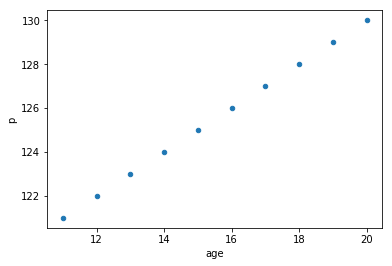

In [107]:
pl = excel.plot(kind='scatter', x='age', y='p').get_figure()
pl.savefig('1.jpg')

In [108]:
import numpy as np
dates = pd.date_range('20190701', periods=6)
df = pd.DataFrame(np.random.rand(6,4), index=dates, columns=list('abcd'))
df




,a,b,c,d
2019-07-01,0.590926,0.350909,0.447555,0.420055
2019-07-02,0.480515,0.820283,0.448496,0.416797
2019-07-03,0.845409,0.520283,0.095268,0.114282
2019-07-04,0.514740,0.384502,0.182193,0.916910
2019-07-05,0.631040,0.545507,0.368787,0.810962
2019-07-06,0.471751,0.912403,0.644166,0.633903


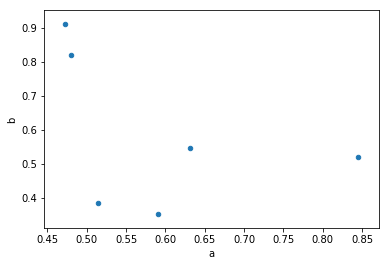

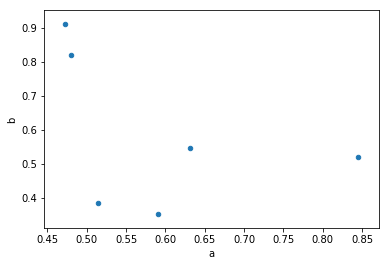

In [110]:
pl = df.plot(kind='scatter', x='a', y='b').get_figure()
pl.savefig('2.jpg')